** bold textRICE LEAF DISEASE DETECTION**


*INTRODUCTION*


The rice leaf suffers from several bacterial, viral, or fungal diseases and these diseases reduce rice production significantly. To sustain rice demand for a vast population globally.The rice leaves related diseases often pose threats to the sustainable production of rice affecting many farmers around the world. Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population.

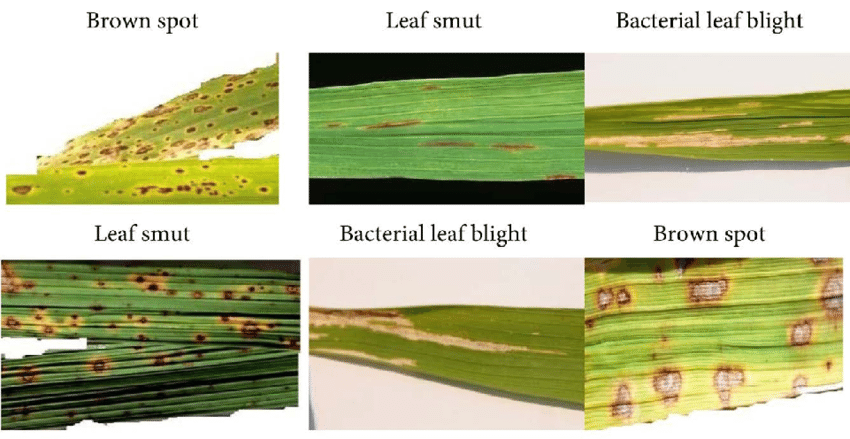

**Classification Problem:**


Our goal is to build a model that would automatically classify rice leaf diseases. For this, we have taken three major attacking diseases in rice plants like leaf blast, bacterial blight and brown spot. We created a model that would determine if the future data inputs will fall in either of these 3 diseases- leaf,blast, bacterial blight and brown spot.

We have deviced the project into multiple steps

• Loading Data

• Preparing Dataset

• Data Preproocessing

• Model Building

• Trining

• Check

This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.


Classes

●	Leaf smut

●	Brown spot

●	Bacterial leaf blight


# **Python implementation**

### Importing Library

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
%matplotlib inline
import seaborn as sns

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

# **Loading the data using drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen=ImageDataGenerator()

In [6]:
data_generator=datagen.flow_from_directory('/content/drive/MyDrive/Data',target_size=(244,244),class_mode='categorical',shuffle=False,batch_size=120)

Found 120 images belonging to 3 classes.


In [7]:
data_generator.next()

(array([[[[230., 215., 210.],
          [228., 215., 209.],
          [228., 213., 208.],
          ...,
          [229., 214., 209.],
          [228., 218., 209.],
          [229., 215., 212.]],
 
         [[228., 215., 209.],
          [227., 214., 208.],
          [229., 214., 209.],
          ...,
          [232., 217., 212.],
          [231., 218., 212.],
          [230., 215., 210.]],
 
         [[228., 215., 209.],
          [228., 215., 209.],
          [231., 213., 209.],
          ...,
          [228., 215., 209.],
          [230., 217., 211.],
          [233., 215., 211.]],
 
         ...,
 
         [[229., 216., 210.],
          [229., 216., 208.],
          [228., 217., 211.],
          ...,
          [224., 215., 210.],
          [228., 215., 209.],
          [228., 214., 211.]],
 
         [[228., 215., 209.],
          [228., 213., 208.],
          [227., 216., 210.],
          ...,
          [227., 216., 212.],
          [228., 215., 209.],
          [228., 215., 209.

# Lets Load the image data as X and target as Y

In [8]:
X, y = data_generator.next()

In [9]:
X.shape

(120, 244, 244, 3)

In [10]:
y.shape

(120, 3)

In [11]:
X

array([[[[230., 215., 210.],
         [228., 215., 209.],
         [228., 213., 208.],
         ...,
         [229., 214., 209.],
         [228., 218., 209.],
         [229., 215., 212.]],

        [[228., 215., 209.],
         [227., 214., 208.],
         [229., 214., 209.],
         ...,
         [232., 217., 212.],
         [231., 218., 212.],
         [230., 215., 210.]],

        [[228., 215., 209.],
         [228., 215., 209.],
         [231., 213., 209.],
         ...,
         [228., 215., 209.],
         [230., 217., 211.],
         [233., 215., 211.]],

        ...,

        [[229., 216., 210.],
         [229., 216., 208.],
         [228., 217., 211.],
         ...,
         [224., 215., 210.],
         [228., 215., 209.],
         [228., 214., 211.]],

        [[228., 215., 209.],
         [228., 213., 208.],
         [227., 216., 210.],
         ...,
         [227., 216., 212.],
         [228., 215., 209.],
         [228., 215., 209.]],

        [[228., 213., 208.],
       

In [12]:
y# we get y as already one hot encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

### Lets give the classes names

In [13]:
classes=['Bacterial leaf blight','Brown spot','Leaf smut']

In [14]:
len(y)

120

In [15]:
for i in range(len(y)):
  print(classes[np.argmax(y[i])])

Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot

#### X and y are loaded in correct format

In [16]:
X.shape

(120, 244, 244, 3)

In [17]:
y.shape

(120, 3)

# **Data visualization**

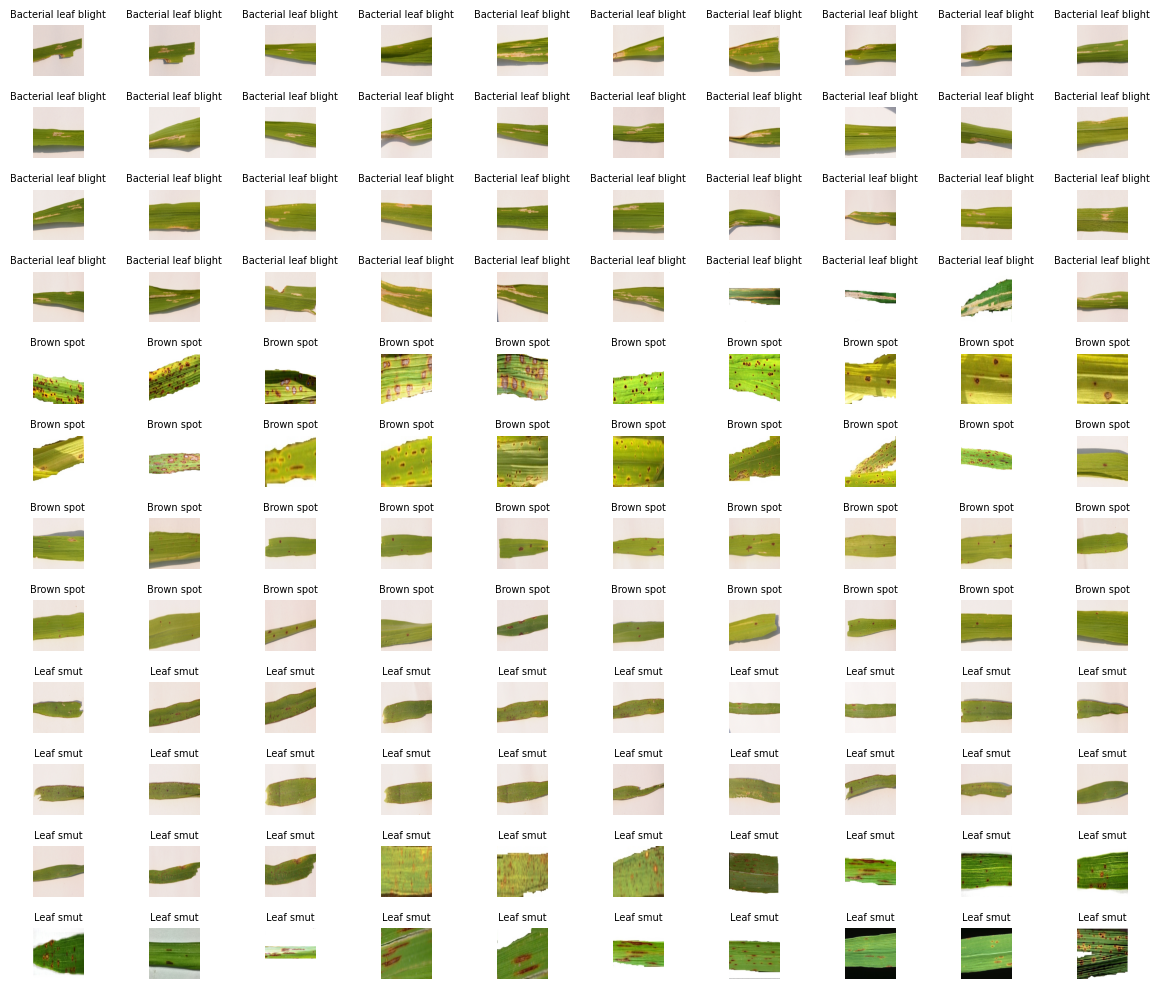

In [18]:
# lets just visualize our data
plt.figure(figsize=(12,10))
plotnumber=1
for i in range(len(X)):
  plt.subplot(12,10,plotnumber)
  plt.imshow(X[i]/255) # because scale must be in between 1 and 0
  plt.axis('off')
  plt.title(classes[np.argmax(y[i])],fontsize=7)
  plotnumber+=1
plt.tight_layout()
plt.show()

# **Data preprocessing**

### Feature Scaling

In [19]:
# Feature Scaling
X_scaled=X/255
X_scaled

array([[[[0.9019608 , 0.84313726, 0.8235294 ],
         [0.89411765, 0.84313726, 0.81960785],
         [0.89411765, 0.8352941 , 0.8156863 ],
         ...,
         [0.8980392 , 0.8392157 , 0.81960785],
         [0.89411765, 0.85490197, 0.81960785],
         [0.8980392 , 0.84313726, 0.83137256]],

        [[0.89411765, 0.84313726, 0.81960785],
         [0.8901961 , 0.8392157 , 0.8156863 ],
         [0.8980392 , 0.8392157 , 0.81960785],
         ...,
         [0.9098039 , 0.8509804 , 0.83137256],
         [0.90588236, 0.85490197, 0.83137256],
         [0.9019608 , 0.84313726, 0.8235294 ]],

        [[0.89411765, 0.84313726, 0.81960785],
         [0.89411765, 0.84313726, 0.81960785],
         [0.90588236, 0.8352941 , 0.81960785],
         ...,
         [0.89411765, 0.84313726, 0.81960785],
         [0.9019608 , 0.8509804 , 0.827451  ],
         [0.9137255 , 0.84313726, 0.827451  ]],

        ...,

        [[0.8980392 , 0.84705883, 0.8235294 ],
         [0.8980392 , 0.84705883, 0.8156863 ]

In [20]:
# y is already one hot encoded
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

# **Model Creation**

In [21]:
# Stratified split ensures all classes will have equally split train and test
# Stratified split is useful whn we have less amount of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,stratify=y,random_state=42)

In [22]:
X_train.shape

(90, 244, 244, 3)

In [23]:
X_test.shape

(30, 244, 244, 3)

# **Model1**
- Lets try a simple model with 2 convoutional layers without any dropout, regularization or normalization
- We will compile it with adam optimizer

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten


model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(244,244,3)))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))

model1.add(Dense(3,activation='softmax')) # Softmax because it is classification task



In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 222784)            0         
                                                                 
 dense (Dense)               (None, 128)               2

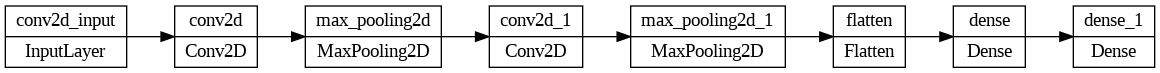

In [ ]:
# Just a visuzlization of model.sumary()
keras.utils.plot_model(model1,rankdir='LR')

In [26]:
# we are just trying adam optimizer, and during training accuracy metric will be calculated,
#loss is 'categorical_cross_entropy' because of classification task
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history1=model1.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2,shuffle=True)

Epoch 1/30
3/3 [==============================] - 8s 597ms/step - loss: 8.7523 - accuracy: 0.3333 - val_loss: 16.2612 - val_accuracy: 0.3889
Epoch 2/30
3/3 [==============================] - 0s 58ms/step - loss: 11.6091 - accuracy: 0.3194 - val_loss: 6.8012 - val_accuracy: 0.1667
Epoch 3/30
3/3 [==============================] - 0s 56ms/step - loss: 3.5657 - accuracy: 0.3611 - val_loss: 0.9783 - val_accuracy: 0.4444
Epoch 4/30
3/3 [==============================] - 0s 58ms/step - loss: 1.0935 - accuracy: 0.4167 - val_loss: 1.0617 - val_accuracy: 0.3889
Epoch 5/30
3/3 [==============================] - 0s 60ms/step - loss: 0.9104 - accuracy: 0.5694 - val_loss: 1.0777 - val_accuracy: 0.3889
Epoch 6/30
3/3 [==============================] - 0s 57ms/step - loss: 0.9700 - accuracy: 0.4444 - val_loss: 1.0978 - val_accuracy: 0.3889
Epoch 7/30
3/3 [==============================] - 0s 56ms/step - loss: 0.7605 - accuracy: 0.6111 - val_loss: 1.3494 - val_accuracy: 0.3889
Epoch 8/30
3/3 [========

In [28]:
#Predictions of model1 on X_test
y_pred1=model1.predict(X_test)

1/1 [==============================] - 1s 573ms/step


In [29]:
y_pred1

array([[9.79857862e-01, 6.79728482e-03, 1.33448616e-02],
       [9.90779161e-01, 6.52503804e-04, 8.56830645e-03],
       [1.40338855e-07, 4.62472113e-03, 9.95375216e-01],
       [2.95332796e-07, 9.07380581e-02, 9.09261644e-01],
       [6.38573110e-01, 2.35902262e-03, 3.59067857e-01],
       [6.93571925e-01, 3.25486995e-02, 2.73879349e-01],
       [1.49847995e-02, 6.13625832e-02, 9.23652649e-01],
       [9.87447798e-01, 1.22588389e-02, 2.93367921e-04],
       [3.24708134e-01, 3.69566935e-03, 6.71596229e-01],
       [1.29121557e-01, 1.23984896e-01, 7.46893585e-01],
       [5.20341159e-10, 9.96033847e-01, 3.96618806e-03],
       [9.72701490e-01, 2.71384977e-02, 1.60068812e-04],
       [5.36304601e-02, 2.72259233e-04, 9.46097314e-01],
       [7.31308845e-08, 9.17053163e-01, 8.29467177e-02],
       [9.81293499e-01, 7.21440278e-03, 1.14922095e-02],
       [9.99985814e-01, 9.79545405e-08, 1.40176444e-05],
       [2.34581918e-07, 9.94991481e-01, 5.00830123e-03],
       [9.99998927e-01, 5.89335

In [30]:
test_loss,test_accuracy=model1.evaluate(X_test,y_test)
train_loss,train_accuracy=model1.evaluate(X_train,y_train)

print('test loss:{} and test accuracy:{}'.format(test_loss,test_accuracy))
print('train loss:{} and train accuracy:{}'.format(train_loss,train_accuracy))

3/3 [==============================] - 1s 234ms/step - loss: 0.3370 - accuracy: 0.9000
test loss:1.5598567724227905 and test accuracy:0.6666666865348816
train loss:0.33698731660842896 and train accuracy:0.8999999761581421


In [31]:
#lets create a function for the above for resuability
def evaluate(model):
  train_accuracy = model.evaluate(X_train, y_train,verbose=0)[1]
  test_accuracy = model.evaluate(X_test, y_test,verbose=0)[1]


  result ={
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    }

  return result



In [32]:
# Using the function for evaluation
evaluate(model1)

{'train_accuracy': 0.8999999761581421, 'test_accuracy': 0.6666666865348816}

In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred1,axis=1)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.75      0.30      0.43        10
           2       0.64      0.70      0.67        10

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.63        30
weighted avg       0.68      0.67      0.63        30



In [34]:
# history1.history returns a dictionary with loss and accuracy at each epochs
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

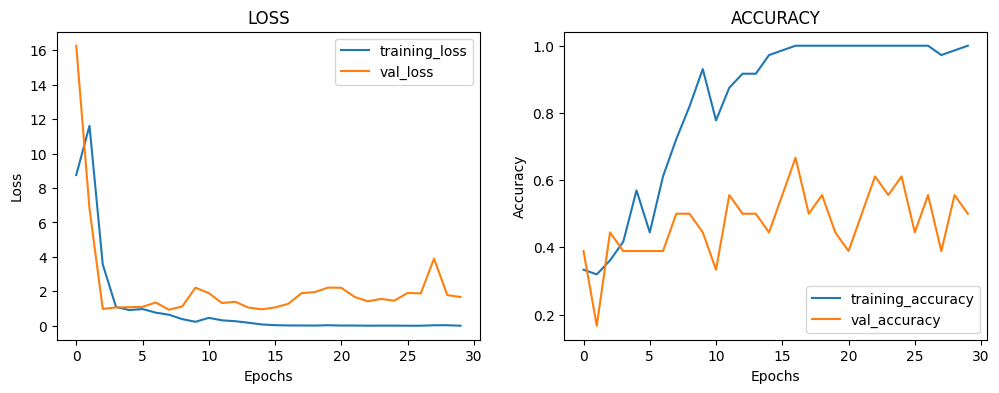

In [35]:
# Lets plot loss and accuracy vs epochs for model1 with history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history1.history['loss'],label='training_loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'],label='training_accuracy')
plt.plot(history1.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
# Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred1[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Model2**
- Lets make model2 with custom learning rate
- adam had a default learning rate of 0.001 in model1
- in model2 lets try with Adam(learning_rate=0.0001)


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten


model2=Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(244,244,3)))
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))

model2.add(Dense(3,activation='softmax')) # Softmax because it is classification task


In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 121, 121, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 59, 59, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 222784)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [39]:
# Changing adam learning rate to 0.0001
from keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
history2=model2.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2,shuffle=True)

Epoch 1/30
3/3 [==============================] - 2s 191ms/step - loss: 1.8568 - accuracy: 0.2917 - val_loss: 1.6897 - val_accuracy: 0.1667
Epoch 2/30
3/3 [==============================] - 0s 96ms/step - loss: 1.3240 - accuracy: 0.3750 - val_loss: 1.3456 - val_accuracy: 0.4444
Epoch 3/30
3/3 [==============================] - 0s 74ms/step - loss: 1.2108 - accuracy: 0.3056 - val_loss: 1.1660 - val_accuracy: 0.1667
Epoch 4/30
3/3 [==============================] - 0s 67ms/step - loss: 1.0478 - accuracy: 0.3750 - val_loss: 1.3095 - val_accuracy: 0.3889
Epoch 5/30
3/3 [==============================] - 0s 66ms/step - loss: 1.1781 - accuracy: 0.5278 - val_loss: 1.3457 - val_accuracy: 0.3889
Epoch 6/30
3/3 [==============================] - 0s 65ms/step - loss: 1.1683 - accuracy: 0.3194 - val_loss: 1.1204 - val_accuracy: 0.3889
Epoch 7/30
3/3 [==============================] - 0s 54ms/step - loss: 1.0319 - accuracy: 0.3611 - val_loss: 1.0563 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==========

In [41]:
y_pred2=model2.predict(X_test)

1/1 [==============================] - 0s 74ms/step


In [42]:
evaluate(model2)

{'train_accuracy': 0.8444444537162781, 'test_accuracy': 0.6666666865348816}

In [43]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred2,axis=1)))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.75      0.60      0.67        10
           2       1.00      0.40      0.57        10

    accuracy                           0.67        30
   macro avg       0.77      0.67      0.65        30
weighted avg       0.77      0.67      0.65        30



In [44]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

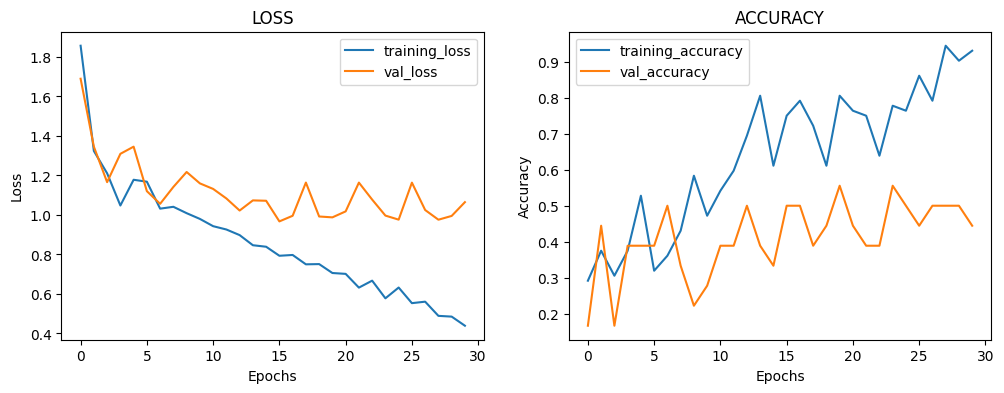

In [45]:
# Lets plot loss and accuracy vs epochs for model2
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history2.history['loss'],label='training_loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'],label='training_accuracy')
plt.plot(history2.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
#  Now lets visualize the actual test data and its predictions for model2
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred2[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **model3**
- Increasing training size using Data Augmentation
- A technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

In [47]:
# For understanding lets take one data point X_scaled[0] and augment it and visuzlize the results
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [48]:
#this is the data we are going to augment
X_scaled[0].shape

(244, 244, 3)

In [49]:
#we should convert the dimension to this form
np.expand_dims(X_scaled[0],axis=0).shape

(1, 244, 244, 3)

In [50]:
aug_sample=data_gen.flow(np.expand_dims(X_scaled[0],axis=0),batch_size=1)

In [51]:
#Gives us the augmented data of X_scaled[0]
aug_sample.next()

array([[[[0.8871849 , 0.83182776, 0.81824225],
         [0.89317524, 0.83482295, 0.81615746],
         [0.8872489 , 0.83185977, 0.81912065],
         ...,
         [0.8784314 , 0.8352941 , 0.8117647 ],
         [0.8784314 , 0.8352941 , 0.8117647 ],
         [0.8784314 , 0.8352941 , 0.8117647 ]],

        [[0.8878925 , 0.8321816 , 0.8171809 ],
         [0.8924677 , 0.83446914, 0.8165113 ],
         [0.88795644, 0.8322135 , 0.8187669 ],
         ...,
         [0.8852177 , 0.83755624, 0.81402683],
         [0.88627905, 0.83791   , 0.8143806 ],
         [0.8873404 , 0.8382638 , 0.8147344 ]],

        [[0.88860005, 0.8325353 , 0.81611955],
         [0.8917601 , 0.8341154 , 0.816865  ],
         [0.888664  , 0.83256733, 0.8184131 ],
         ...,
         [0.89693445, 0.84146184, 0.8201785 ],
         [0.89799577, 0.8418156 , 0.8208861 ],
         [0.89905715, 0.8421694 , 0.82159364]],

        ...,

        [[0.8941977 , 0.83729494, 0.81672674],
         [0.8937559 , 0.84241545, 0.81900835]

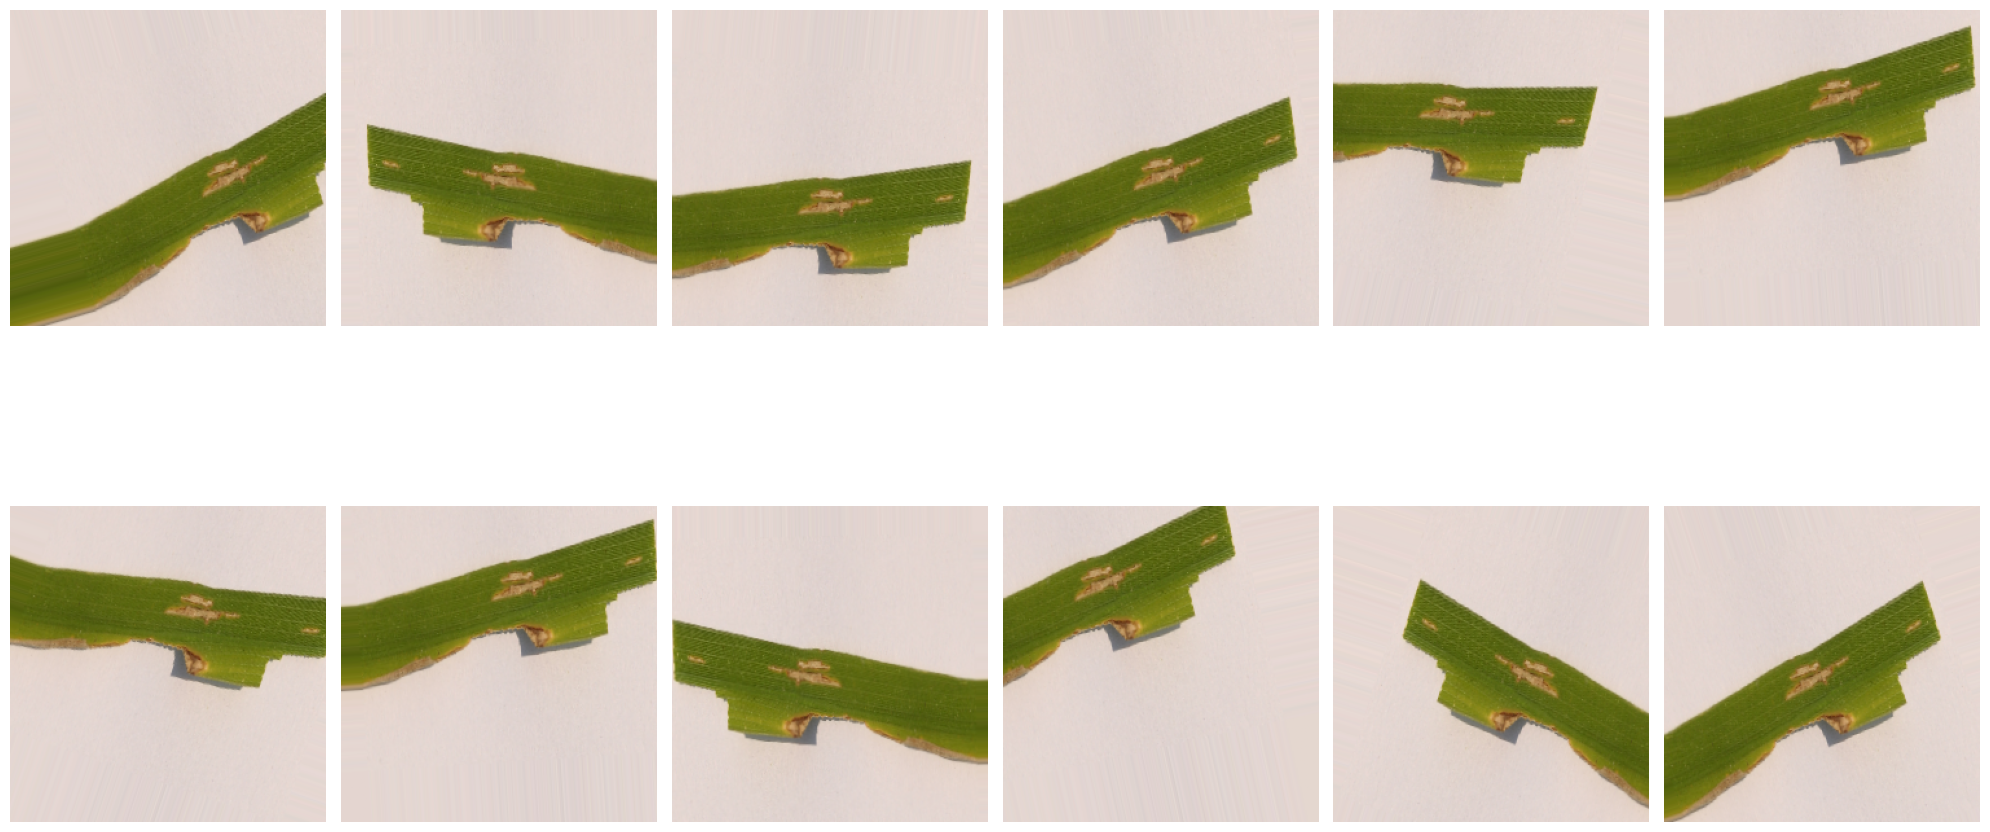

In [52]:
# Lets plot the Augmented images of X_scaled[0]
plt.figure(figsize=(20,20))

for i in range(1,13):
  plt.subplot(4,6,i)
  plt.imshow(aug_sample.next()[0])
  plt.axis('off')

plt.tight_layout()
plt.show()

- Images are generated with shifts and rotations, similarly we can do this for the entire training data to increase the training set size

- let us now augment the entire train data

In [53]:
# Augmentation for entire training data
datagen= ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [54]:
augmented_data=datagen.flow(X_train,y_train,batch_size=32)

In [55]:
augmented_data[0]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

- lets introduce dropout layer for model3

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten


model3=Sequential()

model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(244,244,3)))
model3.add(MaxPool2D(2,2))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPool2D(2,2))

model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(MaxPool2D(2,2))

model3.add(Flatten())

model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3,activation='softmax')) # Softmax because it is classification task



In [57]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 121, 121, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 59, 59, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 128)      

In [58]:
# we are just trying adam optimizer, and during training accuracy metric will be calculated,
#loss is 'categorical_cross_entropy' because of classification task
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
len(X_train)

90

In [60]:
# Steps per epochs-refers to the number of batches processed by the model during one epoch of training.
history3=model3.fit(augmented_data,batch_size=32,epochs=70,steps_per_epoch=len(X_train)//32,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/70
2/2 [==============================] - 6s 2s/step - loss: 3.4684 - accuracy: 0.3966 - val_loss: 3.3440 - val_accuracy: 0.3333
Epoch 2/70
2/2 [==============================] - 1s 681ms/step - loss: 2.1508 - accuracy: 0.4062 - val_loss: 1.2316 - val_accuracy: 0.3333
Epoch 3/70
2/2 [==============================] - 1s 404ms/step - loss: 1.2404 - accuracy: 0.3103 - val_loss: 1.0914 - val_accuracy: 0.3333
Epoch 4/70
2/2 [==============================] - 1s 489ms/step - loss: 1.1095 - accuracy: 0.3276 - val_loss: 1.0877 - val_accuracy: 0.3333
Epoch 5/70
2/2 [==============================] - 1s 454ms/step - loss: 1.0839 - accuracy: 0.3906 - val_loss: 1.0672 - val_accuracy: 0.3667
Epoch 6/70
2/2 [==============================] - 1s 510ms/step - loss: 1.0820 - accuracy: 0.4138 - val_loss: 1.0467 - val_accuracy: 0.4667
Epoch 7/70
2/2 [==============================] - 1s 405ms/step - loss: 1.0934 - accuracy: 0.3793 - val_loss: 1.0215 - val_accuracy: 0.4333
Epoch 8/70
2/2 [=======

In [61]:
evaluate(model3)

{'train_accuracy': 0.8222222328186035, 'test_accuracy': 0.8333333134651184}

In [62]:
y_pred3=model3.predict(X_test)

1/1 [==============================] - 0s 124ms/step


In [63]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred3,axis=1)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.88      0.70      0.78        10
           2       1.00      0.80      0.89        10

    accuracy                           0.83        30
   macro avg       0.86      0.83      0.83        30
weighted avg       0.86      0.83      0.83        30



In [64]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

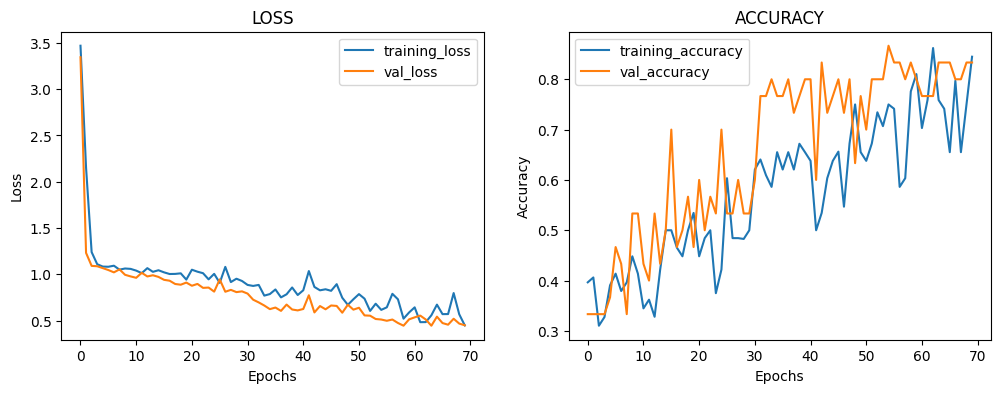

In [65]:
# Lets plot loss and accuracy vs epochs for model3
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history3.history['loss'],label='training_loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history3.history['accuracy'],label='training_accuracy')
plt.plot(history3.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [66]:
#  Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred3[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# model4
- Aumentation with callbacks- modelcheckpointer

In [88]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model4.add(MaxPool2D(2, 2))

model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPool2D(2, 2))

model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPool2D(2, 2))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(3, activation='softmax'))  # Softmax because it is a classification task



In [89]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 121, 121, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 59, 59, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 28, 28, 128)      

In [90]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
# Modelcheckpointer ensures that we can reload the best performing model weights
# We will moniter only train accuracy to ensure no data leakage
from keras.callbacks import ModelCheckpoint

check_pointer=ModelCheckpoint(filepath='model.weights.best.hdf5',monitor='accuracy',save_best_only=True)

In [92]:
history4=model4.fit(augmented_data,batch_size=32,epochs=90,
                    steps_per_epoch=len(X_train)//32,validation_data=(X_test,y_test),
                    shuffle=True,callbacks=[check_pointer])

Epoch 1/90
2/2 [==============================] - 3s 800ms/step - loss: 3.0776 - accuracy: 0.2586 - val_loss: 2.0033 - val_accuracy: 0.3333
Epoch 2/90
2/2 [==============================] - 1s 400ms/step - loss: 2.1185 - accuracy: 0.2241 - val_loss: 1.1407 - val_accuracy: 0.3333
Epoch 3/90
2/2 [==============================] - 1s 959ms/step - loss: 1.2005 - accuracy: 0.2931 - val_loss: 1.1102 - val_accuracy: 0.3333
Epoch 4/90
2/2 [==============================] - 2s 1s/step - loss: 1.1120 - accuracy: 0.3125 - val_loss: 1.0954 - val_accuracy: 0.3333
Epoch 5/90
2/2 [==============================] - 1s 653ms/step - loss: 1.1289 - accuracy: 0.2241 - val_loss: 1.1004 - val_accuracy: 0.3333
Epoch 6/90
2/2 [==============================] - 2s 2s/step - loss: 1.1174 - accuracy: 0.3276 - val_loss: 1.1026 - val_accuracy: 0.3333
Epoch 7/90
2/2 [==============================] - 1s 500ms/step - loss: 1.1131 - accuracy: 0.2812 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 8/90
2/2 [==========

In [93]:
evaluate(model4)

{'train_accuracy': 0.8333333134651184, 'test_accuracy': 0.7333333492279053}

In [94]:
model4.load_weights('/content/model.weights.best.hdf5')

In [95]:
evaluate(model4)

{'train_accuracy': 0.8444444537162781, 'test_accuracy': 0.8333333134651184}

In [96]:
y_pred4=model4.predict(X_test)

1/1 [==============================] - 0s 76ms/step


In [97]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred4,axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.82      0.90      0.86        10
           2       1.00      0.70      0.82        10

    accuracy                           0.83        30
   macro avg       0.86      0.83      0.83        30
weighted avg       0.86      0.83      0.83        30



In [98]:
history4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

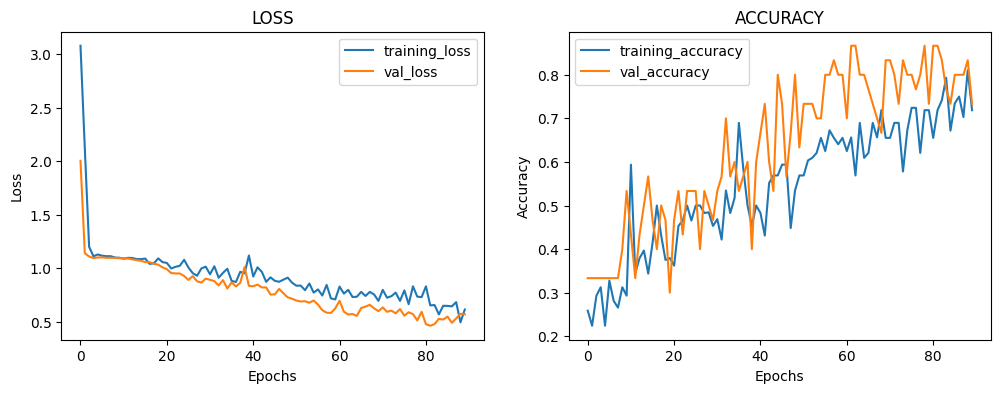

In [99]:
# Lets plot loss and accuracy vs epochs for model4
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history4.history['loss'],label='training_loss')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history4.history['accuracy'],label='training_accuracy')
plt.plot(history4.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [101]:
#  Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred4[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Model5
- Trying a more complex architecture, adding another dense layer with 256 neurons
- Further trying to increase the epochs, modelcheckpointer is used to ensure there is no overfitting

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model5 = Sequential()

model5.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model5.add(MaxPooling2D(2, 2))

model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))


model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))


model5.add(Flatten())

model5.add(Dense(256, activation='relu'))

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.3))


model5.add(Dense(3, activation='softmax'))

In [112]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 242, 242, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 121, 121, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 119, 119, 32)      4640      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 28, 28, 64)       

In [113]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
from keras.callbacks import ModelCheckpoint

check_pointer=ModelCheckpoint(filepath='model5.weights.best.hdf5',monitor='accuracy',save_best_only=True)

In [115]:
history5=model5.fit(augmented_data,batch_size=32,epochs=180,
                    steps_per_epoch=len(X_train)//32,validation_data=(X_test,y_test),
                    shuffle=True,callbacks=[check_pointer])

Epoch 1/180
2/2 [==============================] - 3s 661ms/step - loss: 1.1471 - accuracy: 0.3438 - val_loss: 1.1252 - val_accuracy: 0.3333
Epoch 2/180
2/2 [==============================] - 2s 1s/step - loss: 1.0713 - accuracy: 0.3621 - val_loss: 1.0778 - val_accuracy: 0.5333
Epoch 3/180
2/2 [==============================] - 1s 359ms/step - loss: 1.1108 - accuracy: 0.3103 - val_loss: 1.0581 - val_accuracy: 0.4000
Epoch 4/180
2/2 [==============================] - 1s 364ms/step - loss: 1.0988 - accuracy: 0.3621 - val_loss: 1.0409 - val_accuracy: 0.5000
Epoch 5/180
2/2 [==============================] - 1s 679ms/step - loss: 1.0591 - accuracy: 0.4844 - val_loss: 1.0283 - val_accuracy: 0.3667
Epoch 6/180
2/2 [==============================] - 1s 451ms/step - loss: 1.0596 - accuracy: 0.3276 - val_loss: 0.9914 - val_accuracy: 0.4667
Epoch 7/180
2/2 [==============================] - 1s 441ms/step - loss: 1.0753 - accuracy: 0.3966 - val_loss: 1.0307 - val_accuracy: 0.4333
Epoch 8/180
2/2 

In [116]:
evaluate(model5)

{'train_accuracy': 0.8999999761581421, 'test_accuracy': 0.8999999761581421}

In [108]:
model5.save_weights('model5_orginal.weights.best.hdf5')

In [109]:
model5.load_weights('/content/model5.weights.best.hdf5')

In [117]:
evaluate(model5)

{'train_accuracy': 0.8999999761581421, 'test_accuracy': 0.8999999761581421}

In [118]:
y_pred5=model5.predict(X_test)

1/1 [==============================] - 0s 98ms/step


In [119]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred5,axis=1)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [120]:
history5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

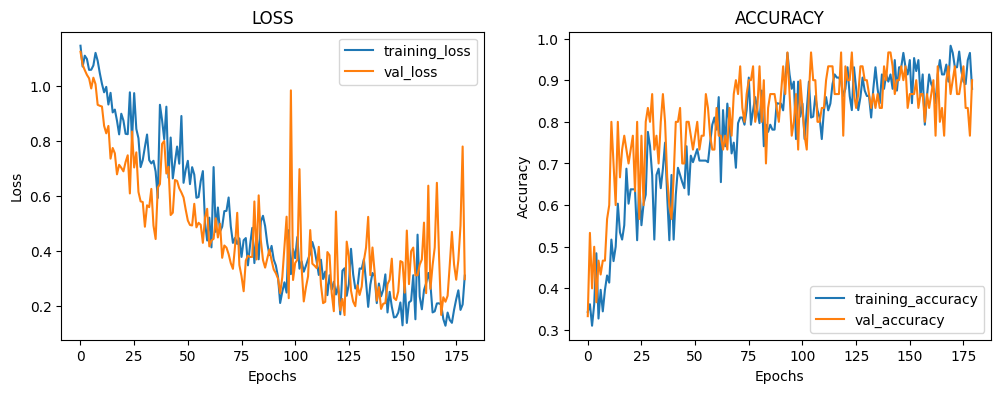

In [121]:
# Lets plot loss and accuracy vs epochs for model5
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history5.history['loss'],label='training_loss')
plt.plot(history5.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history5.history['accuracy'],label='training_accuracy')
plt.plot(history5.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [122]:
#  Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred5[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Model6
- Just adding same padding to the previous model

In [123]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

model6 = Sequential()

model6.add(Conv2D(filters=16, kernel_size=(3, 3),padding='same' ,activation='relu', input_shape=(244, 244, 3)))
model6.add(MaxPooling2D(2, 2))

model6.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model6.add(MaxPooling2D(2, 2))

model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(2, 2))

model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(2, 2))

model6.add(Flatten())

model6.add(Dense(256, activation='relu'))

model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.3))

model6.add(Dense(3, activation='softmax'))

In [124]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

check_pointer = ModelCheckpoint(filepath='model6.weights.best.hdf5', monitor='accuracy', save_best_only=True)


In [125]:
history6 = model6.fit(augmented_data, batch_size=32, epochs=150,
                     steps_per_epoch=len(X_train)//32, validation_data=(X_test, y_test),
                     shuffle=True, callbacks=[check_pointer])

Epoch 1/150
2/2 [==============================] - 8s 915ms/step - loss: 2.7393 - accuracy: 0.2656 - val_loss: 1.1342 - val_accuracy: 0.3333


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/150
2/2 [==============================] - 2s 378ms/step - loss: 1.1751 - accuracy: 0.2931 - val_loss: 1.1016 - val_accuracy: 0.3333
Epoch 3/150
2/2 [==============================] - 1s 693ms/step - loss: 1.1290 - accuracy: 0.2969 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 4/150
2/2 [==============================] - 1s 371ms/step - loss: 1.1083 - accuracy: 0.2586 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 5/150
2/2 [==============================] - 1s 616ms/step - loss: 1.0918 - accuracy: 0.3448 - val_loss: 1.0953 - val_accuracy: 0.3333
Epoch 6/150
2/2 [==============================] - 1s 434ms/step - loss: 1.0995 - accuracy: 0.2931 - val_loss: 1.0918 - val_accuracy: 0.4667
Epoch 7/150
2/2 [==============================] - 1s 647ms/step - loss: 1.0948 - accuracy: 0.3966 - val_loss: 1.0897 - val_accuracy: 0.4667
Epoch 8/150
2/2 [==============================] - 1s 695ms/step - loss: 1.0825 - accuracy: 0.4375 - val_loss: 1.0782 - val_accuracy: 0.4667
Epoch 9/150
2

In [126]:
evaluate(model6)

{'train_accuracy': 0.8999999761581421, 'test_accuracy': 0.9666666388511658}

In [127]:
model6.load_weights('model6.weights.best.hdf5')
evaluate(model6)

{'train_accuracy': 0.9222221970558167, 'test_accuracy': 0.9333333373069763}

In [128]:
y_pred6=model6.predict(X_test)

1/1 [==============================] - 0s 154ms/step


In [129]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred6,axis=1)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [130]:
history6.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

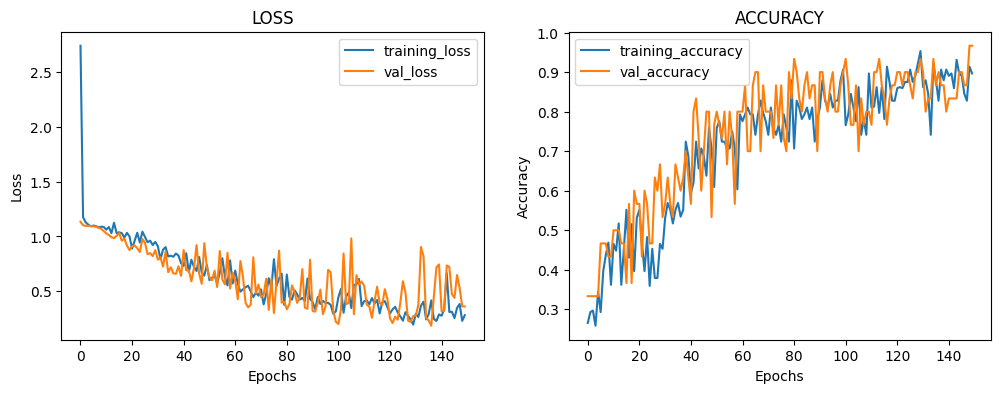

In [131]:
# Lets plot loss and accuracy vs epochs for model5
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history6.history['loss'],label='training_loss')
plt.plot(history6.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history6.history['accuracy'],label='training_accuracy')
plt.plot(history6.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [132]:
#  Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred6[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Model7 -Transfer Learning with Pretrained model

In [139]:
from keras.applications import MobileNetV2
from keras import Model
from keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(244,244,3))

avg=GlobalAveragePooling2D()(base_model.output)
x=Dense(256,activation='relu')(avg)
output=Dense(3,activation='softmax')(x)

model7=Model(inputs=base_model.input,outputs=output)

In [140]:
model7.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 122, 122, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 122, 122, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 122, 122, 32)         0         ['bn_Conv1[0][0]']      

In [141]:
base_model.input

<KerasTensor: shape=(None, 244, 244, 3) dtype=float32 (created by layer 'input_2')>

In [142]:
for layer in base_model.layers:
  layer.trainable=False

In [143]:
from keras.optimizers import Adam
model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [144]:
history7=model7.fit(augmented_data,epochs=25,validation_data=(X_test,y_test),batch_size=32,steps_per_epoch=len(X_train)//32)

Epoch 1/25
2/2 [==============================] - 8s 1s/step - loss: 1.3239 - accuracy: 0.3793 - val_loss: 0.7253 - val_accuracy: 0.6333
Epoch 2/25
2/2 [==============================] - 1s 493ms/step - loss: 0.8684 - accuracy: 0.5781 - val_loss: 0.6693 - val_accuracy: 0.6667
Epoch 3/25
2/2 [==============================] - 1s 398ms/step - loss: 0.6344 - accuracy: 0.6552 - val_loss: 0.3208 - val_accuracy: 0.9333
Epoch 4/25
2/2 [==============================] - 1s 500ms/step - loss: 0.4069 - accuracy: 0.8448 - val_loss: 0.3674 - val_accuracy: 0.7667
Epoch 5/25
2/2 [==============================] - 1s 484ms/step - loss: 0.4930 - accuracy: 0.8276 - val_loss: 0.2993 - val_accuracy: 0.8667
Epoch 6/25
2/2 [==============================] - 1s 417ms/step - loss: 0.2925 - accuracy: 0.8793 - val_loss: 0.2183 - val_accuracy: 0.9667
Epoch 7/25
2/2 [==============================] - 1s 600ms/step - loss: 0.1781 - accuracy: 0.9844 - val_loss: 0.2611 - val_accuracy: 0.9333
Epoch 8/25
2/2 [=======

In [145]:
evaluate(model7)

{'train_accuracy': 0.9888888597488403, 'test_accuracy': 1.0}

In [146]:
y_pred7=model7.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [147]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred7,axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [150]:
history7.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

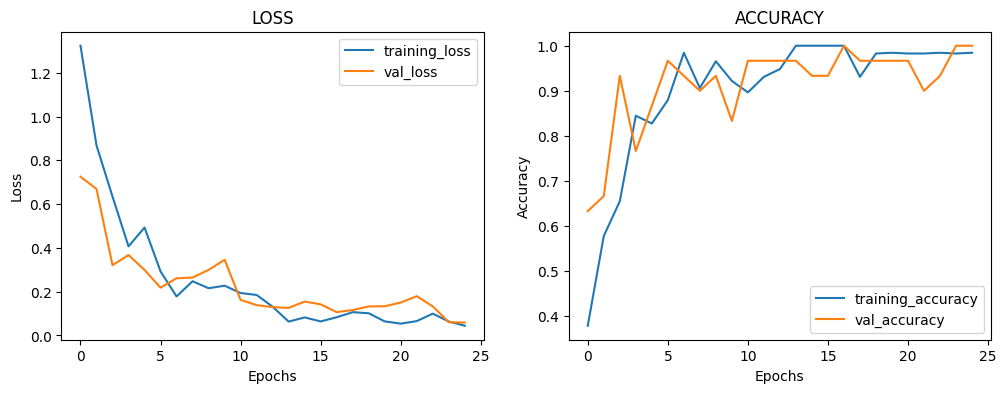

In [151]:
# Lets plot loss and accuracy vs epochs for model5
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# plot for loss
plt.plot(history7.history['loss'],label='training_loss')
plt.plot(history7.history['val_loss'],label='val_loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot for accuracy
plt.subplot(1,2,2)
plt.plot(history7.history['accuracy'],label='training_accuracy')
plt.plot(history7.history['val_accuracy'],label='val_accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [152]:
#  Now lets visualize the actual test data and its predictions
plt.figure(figsize=(20,20))
plotnumber=1
for i in range(len(X_test)):
  plt.subplot(5,6,plotnumber)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f'Actual:{classes[np.argmax(y_test[i])]} \n predicted:{classes[np.argmax(y_pred7[i])]}')

  plotnumber+=1
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Model comparison report

In [154]:
import pandas as pd
models = [model1, model2, model3, model4, model5,model6,model7]

# Creating a DataFrame
df = pd.DataFrame({
    'models': ['model1', 'model2', 'model3', 'model4', 'model5','model6','model7'],
    'train_accuracy': [evaluate(model)['train_accuracy'] for model in models],# using list comprehension
    'test_accuracy': [evaluate(model)['test_accuracy'] for model in models]
})

In [155]:
df

,models,train_accuracy,test_accuracy
0,model1,0.900000,0.666667
1,model2,0.844444,0.666667
2,model3,0.822222,0.833333
3,model4,0.844444,0.833333
4,model5,0.900000,0.900000
5,model6,0.922222,0.933333
6,model7,0.988889,1.000000


# Conclusion
- model4,model5,model6 all perform very well on the test data
- model7 ie transfer learning using MobileNetV2 outperforms all other models.
- model7 can be concluded as the best model

In [156]:
model7.save('model_7_transfer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
